In [14]:
import pandas as pd
from fastai.tabular.all import *
from fastai.tabular.data import *

In [2]:
df = pd.read_csv('../public_data/train.csv')
test = pd.read_csv('../public_data/test.csv')

In [77]:
df.head()
df_small = df.sample(frac=0.5).copy()
print (df_small.columns)

Index(['building_id', 'has_geotechnical_risk',
       'has_geotechnical_risk_fault_crack', 'has_geotechnical_risk_flood',
       'has_geotechnical_risk_land_settlement',
       'has_geotechnical_risk_landslide', 'has_geotechnical_risk_liquefaction',
       'has_geotechnical_risk_other', 'has_geotechnical_risk_rock_fall',
       'damage_grade'],
      dtype='object')


In [78]:
cat_names = ['has_geotechnical_risk',
       'has_geotechnical_risk_fault_crack', 'has_geotechnical_risk_flood',
       'has_geotechnical_risk_land_settlement',
       'has_geotechnical_risk_landslide', 'has_geotechnical_risk_liquefaction',
       'has_geotechnical_risk_other', 'has_geotechnical_risk_rock_fall']
cont_names = []
target = 'damage_grade'
procs = [Categorify, FillMissing, Normalize]

In [79]:
splits = RandomSplitter(valid_pct=0.3)(range_of(df_small))
to = TabularPandas(df, procs=[Categorify, FillMissing,Normalize],
                   cont_names = cont_names,
                   cat_names=cat_names,
                   y_names=target,
                   y_block=CategoryBlock,
                   splits=splits)

In [80]:
dls = to.dataloaders(bs=64)

In [81]:
dls.show_batch()

,has_geotechnical_risk,has_geotechnical_risk_fault_crack,has_geotechnical_risk_flood,has_geotechnical_risk_land_settlement,has_geotechnical_risk_landslide,has_geotechnical_risk_liquefaction,has_geotechnical_risk_other,has_geotechnical_risk_rock_fall,damage_grade
0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,2
2,0,0,0,0,0,0,0,0,5
3,0,0,0,0,0,0,0,0,2
4,0,0,0,0,0,0,0,0,2
5,0,0,0,0,0,0,0,0,4
6,0,0,0,0,0,0,0,0,3
7,0,0,0,0,0,0,0,0,2
8,0,0,0,0,0,0,0,0,4
9,0,0,0,0,0,0,0,0,1


In [82]:
# make very naive predictions
learn = tabular_learner(dls,metrics=[accuracy])

SuggestedLRs(lr_min=0.0019054606556892395, lr_steep=0.3019951581954956)

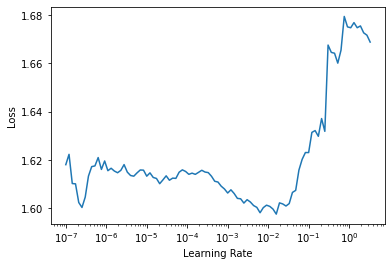

In [83]:
#learn.lr_find(start_lr=1e-8,end_lr=1)
#lr_min=0.001202264428138733, lr_steep=0.008317637257277966)

learn.lr_find()
SuggestedLRs(lr_min=0.0019054606556892395, lr_steep=0.3019951581954956)

In [84]:
# let's try this
#lr=0.00035
lr_min=0.0019054606556892395
lr_steep=0.3019951581954956

In [85]:
learn.fit_one_cycle(1, lr_min)

epoch,train_loss,valid_loss,accuracy,time
0,1.517592,1.522218,0.336607,01:10


In [86]:
learn.fit_one_cycle(1, lr_steep)

epoch,train_loss,valid_loss,accuracy,time
0,1.531396,1.523719,0.336374,00:54


In [57]:
# let's fit more epochs on the lr_min

In [87]:
learn.fit_one_cycle(10, max_lr=slice(lr_min))

KeyboardInterrupt: 

## Intermediate conclusions

We got ~33% accuracy on validation set (0.3 split). It's not that wonderful, so we are now going to investigate the additional data provided in the challenge.